In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
import calendar
pd.options.display.max_rows = 70000

In [2]:
transit_1 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/2017_aforament_detall_valor-trafico.csv', dtype='str')

In [3]:
transit_2 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/2018_aforament_detall_valor-trafico.csv', dtype='str')

In [4]:
transit_3  = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/2019_aforament_detall_valor.csv', dtype='str')

In [5]:
transit_total = pd.concat([transit_1, transit_2,transit_3])

In [6]:
transit_total.head()

,Any,Id_aforament,Mes,Codi_tipus_dia,Desc_tipus_dia,Valor_IMD
0,2017,1001,1,1,Dilluns,33986
1,2017,1001,1,2,Laborable,35184
2,2017,1001,1,3,Divendres,38236
3,2017,1001,1,4,Dissabte,26954
4,2017,1001,1,5,Diumenge,20266


In [7]:
transit_total.isnull().sum()

Any               0
Id_aforament      0
Mes               0
Codi_tipus_dia    0
Desc_tipus_dia    0
Valor_IMD         0
dtype: int64

In [8]:
transit_total.shape

(107760, 6)

In [9]:
transit_total['Valor_IMD'].replace(to_replace='Mesura no disponible', value=0, inplace=True)

In [10]:
transit_total['Valor_IMD'].replace(to_replace=0, value=np.nan, inplace=True)

In [11]:
mean_IMD = transit_total['Valor_IMD'].astype(float).mean(skipna=True) 

In [12]:
transit_total['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD, inplace=True)

In [13]:
fechas = transit_total['Any'].astype(str) + '-' + transit_total['Mes'] + '-' + transit_total['Codi_tipus_dia'].astype(str)

In [14]:
transit_total['VALIDO'] = 'V'

In [15]:
transit_total['VALIDO'] = transit_total.VALIDO == 'V'

In [16]:
transit_total['data'] = pd.to_datetime(fechas)

In [17]:
transit_total.drop(['Mes'],  axis=1, inplace=True)

In [18]:
transit_total.drop(['Codi_tipus_dia'], axis=1, inplace=True)

In [19]:
transit_total.drop(['Desc_tipus_dia'], axis=1, inplace=True)

In [20]:
transit_total.head()

,Any,Id_aforament,Valor_IMD,VALIDO,data
0,2017,1001,33986,True,2017-01-01
1,2017,1001,35184,True,2017-01-02
2,2017,1001,38236,True,2017-01-03
3,2017,1001,26954,True,2017-01-04
4,2017,1001,20266,True,2017-01-05


In [21]:
aforaments = {Id:group for Id, group in transit_total.groupby('Id_aforament')}

In [22]:
transit_4071 = aforaments['4071']

In [23]:
transit_4071.set_index('data', inplace=True)

In [24]:
transit_4071

,Any,Id_aforament,Valor_IMD,VALIDO
data,,,,
2017-01-01,2017,4071,32776,True
2017-01-02,2017,4071,33574,True
2017-01-03,2017,4071,34238,True
2017-01-04,2017,4071,26060,True
2017-01-05,2017,4071,21083,True
2017-02-01,2017,4071,32965,True
2017-02-02,2017,4071,33914,True
2017-02-03,2017,4071,33801,True
2017-02-04,2017,4071,24361,True


In [25]:
ultimo_fecha = max(transit_4071.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_4071.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_4071 = transit_4071.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [26]:
transit_4071

,Any,Id_aforament,Valor_IMD,VALIDO
2017-01-01,2017,4071,32776,True
2017-01-02,2017,4071,33574,True
2017-01-03,2017,4071,34238,True
2017-01-04,2017,4071,26060,True
2017-01-05,2017,4071,21083,True
2017-01-06,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN


In [27]:
transit_4071.isnull().sum()

Any             915
Id_aforament    915
Valor_IMD       915
VALIDO          915
dtype: int64

In [28]:
transit_4071['Id_aforament'].replace(to_replace=np.NaN, value=4071, inplace=True)

In [29]:
transit_4071['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [30]:
mean_IMD_1 = transit_4071['Valor_IMD'].astype(float).mean(skipna=True) 

In [31]:
transit_4071['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_1, inplace=True)

In [32]:
transit_4071.drop(['Any'], axis=1, inplace=True)

In [33]:
transit_4071.drop(['Id_aforament'], axis=1, inplace=True)

In [34]:
transit_4071.drop(['VALIDO'],axis=1, inplace=True)

In [35]:
transit_4071.index.names = ['DATA']
transit_4071= transit_4071.reset_index()

In [36]:
transit_4071

,DATA,Valor_IMD
0,2017-01-01,32776
1,2017-01-02,33574
2,2017-01-03,34238
3,2017-01-04,26060
4,2017-01-05,21083
5,2017-01-06,28766
6,2017-01-07,28766
7,2017-01-08,28766
8,2017-01-09,28766
9,2017-01-10,28766


In [37]:
transit_4071.to_csv('transit-4071', index=False)

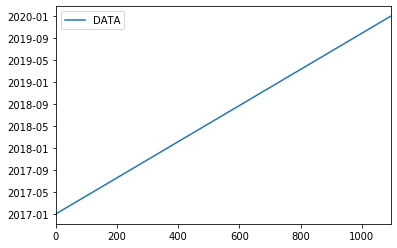

In [38]:
transit_4071.plot()

In [39]:
transit_4095 = aforaments['4095']

In [40]:
transit_4095.set_index('data', inplace=True)

In [41]:
ultimo_fecha = max(transit_4095.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_4095.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_4095 = transit_4095.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [42]:
transit_4095['Id_aforament'].replace(to_replace=np.NaN, value=4095, inplace=True)

In [43]:
transit_4095['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [44]:
mean_IMD_3 = transit_4095['Valor_IMD'].astype(float).mean(skipna=True) 

In [45]:
transit_4095['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_3, inplace=True)

In [46]:
transit_4095.drop(['Any'], axis=1, inplace=True)

In [47]:
transit_4095.drop(['Id_aforament'], axis=1, inplace=True)

In [48]:
transit_4095.drop(['VALIDO'],axis=1, inplace=True)

In [49]:
transit_4095.index.names = ['DATA']
transit_4095= transit_4095.reset_index()

In [50]:
transit_4095.to_csv('transit-4095', index=False)

In [51]:
transit_4095

,DATA,Valor_IMD
0,2017-01-01,9854
1,2017-01-02,11285
2,2017-01-03,11079
3,2017-01-04,9440
4,2017-01-05,7313
5,2017-01-06,11554.3
6,2017-01-07,11554.3
7,2017-01-08,11554.3
8,2017-01-09,11554.3
9,2017-01-10,11554.3


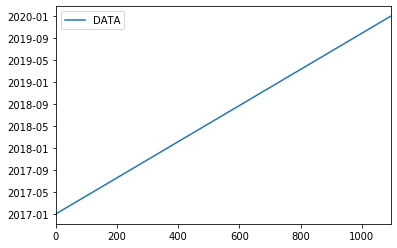

In [52]:
transit_4095.plot()

In [53]:
transit_20013 = aforaments['20013']

In [54]:
transit_20013.set_index('data', inplace=True)

In [55]:
ultimo_fecha = max(transit_20013.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_20013.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_20013 = transit_20013.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [56]:
transit_20013['Id_aforament'].replace(to_replace=np.NaN, value=20013, inplace=True)

In [57]:
transit_20013['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [58]:
mean_IMD_4 = transit_20013['Valor_IMD'].astype(float).mean(skipna=True) 

In [59]:
transit_20013['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_4, inplace=True)

In [60]:
transit_20013.drop(['Any'], axis=1, inplace=True)

In [61]:
transit_20013.drop(['Id_aforament'], axis=1, inplace=True)

In [62]:
transit_20013.drop(['VALIDO'],axis=1, inplace=True)

In [63]:
transit_20013.index.names = ['DATA']
transit_20013= transit_20013.reset_index()

In [64]:
transit_20013.to_csv('transit-20013', index=False)

In [65]:
transit_20013

,DATA,Valor_IMD
0,2017-01-01,1392
1,2017-01-02,1472
2,2017-01-03,1245
3,2017-01-04,786
4,2017-01-05,823
5,2017-01-06,1758.48
6,2017-01-07,1758.48
7,2017-01-08,1758.48
8,2017-01-09,1758.48
9,2017-01-10,1758.48


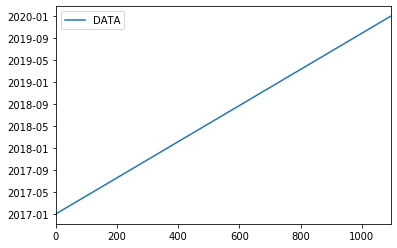

In [66]:
transit_20013.plot()

In [67]:
transit_8001 = aforaments['8001']

In [68]:
transit_8001.set_index('data', inplace=True)

In [69]:
ultimo_fecha = max(transit_8001.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_8001.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_8001 = transit_8001.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [70]:
transit_8001.isnull().sum()

Any             975
Id_aforament    975
Valor_IMD       975
VALIDO          975
dtype: int64

In [71]:
transit_8001['Id_aforament'].replace(to_replace=np.NaN, value=8001, inplace=True)

In [72]:
transit_8001['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [73]:
mean_IMD_2 = transit_8001['Valor_IMD'].astype(float).mean(skipna=True) 

In [74]:
transit_8001['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_2, inplace=True)

In [75]:
transit_8001.drop(['Any'], axis=1, inplace=True)

In [76]:
transit_8001.drop(['Id_aforament'], axis=1, inplace=True)

In [77]:
transit_8001.drop(['VALIDO'],axis=1, inplace=True)

In [78]:
transit_8001.index.names = ['DATA']
transit_8001= transit_8001.reset_index()

In [79]:
transit_8001.to_csv('transit-8001', index=False)

In [80]:
transit_8001

,DATA,Valor_IMD
0,2017-01-01,13620.7
1,2017-01-02,13620.7
2,2017-01-03,13620.7
3,2017-01-04,13620.7
4,2017-01-05,13620.7
5,2017-01-06,13956.7
6,2017-01-07,13956.7
7,2017-01-08,13956.7
8,2017-01-09,13956.7
9,2017-01-10,13956.7


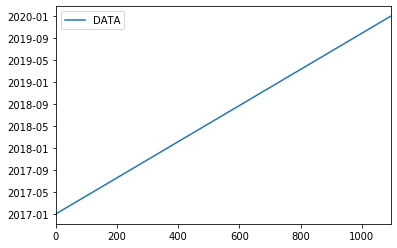

In [81]:
transit_8001.plot()

In [82]:
transit_4036 = aforaments['4036']

In [83]:
transit_4036.set_index('data', inplace=True)

In [84]:
ultimo_fecha = max(transit_4036.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_4036.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_4036 = transit_4036.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [85]:
transit_4036['Id_aforament'].replace(to_replace=np.NaN, value=4036, inplace=True)

In [86]:
transit_4036['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [87]:
mean_IMD_5 = transit_4036['Valor_IMD'].astype(float).mean(skipna=True) 

In [88]:
transit_4036['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_5, inplace=True)

In [89]:
transit_4036.drop(['Any'], axis=1, inplace=True)

In [90]:
transit_4036.drop(['Id_aforament'], axis=1, inplace=True)

In [91]:
transit_4036.drop(['VALIDO'],axis=1, inplace=True)

In [92]:
transit_4036.index.names = ['DATA']
transit_4036 = transit_4036.reset_index()

In [93]:
transit_4036

,DATA,Valor_IMD
0,2017-01-01,29199
1,2017-01-02,30215
2,2017-01-03,32001
3,2017-01-04,23110
4,2017-01-05,17453
5,2017-01-06,26059.3
6,2017-01-07,26059.3
7,2017-01-08,26059.3
8,2017-01-09,26059.3
9,2017-01-10,26059.3


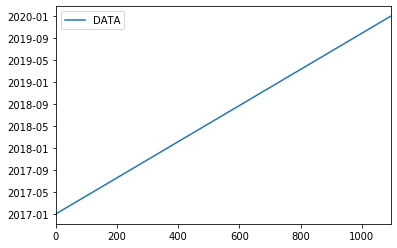

In [94]:
transit_4036.plot()

In [95]:
transit_8039 = aforaments['8039']

In [96]:
transit_8039.set_index('data', inplace=True)

In [97]:
ultimo_fecha = max(transit_8039.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_8039.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_8039 = transit_8039.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [98]:
transit_8039['Id_aforament'].replace(to_replace=np.NaN, value=8039, inplace=True)

In [99]:
transit_8039['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [100]:
mean_IMD_6 = transit_8039['Valor_IMD'].astype(float).mean(skipna=True) 

In [101]:
transit_8039['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_6, inplace=True)

In [102]:
transit_8039.drop(['Any'], axis=1, inplace=True)

In [103]:
transit_8039.drop(['Id_aforament'], axis=1, inplace=True)

In [104]:
transit_8039.drop(['VALIDO'],axis=1, inplace=True)

In [105]:
transit_8039.index.names = ['DATA']
transit_8039 = transit_8039.reset_index()

In [106]:
transit_8039.to_csv('transit-8039', index=False)

In [107]:
transit_8039

,DATA,Valor_IMD
0,2017-01-01,10427
1,2017-01-02,11455
2,2017-01-03,11510
3,2017-01-04,8017
4,2017-01-05,5739
5,2017-01-06,8339.53
6,2017-01-07,8339.53
7,2017-01-08,8339.53
8,2017-01-09,8339.53
9,2017-01-10,8339.53


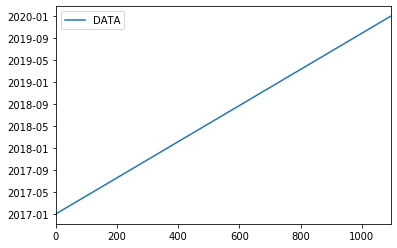

In [108]:
transit_8039.plot()

In [109]:
transit_2020 = aforaments['2020']

In [110]:
transit_2020.set_index('data', inplace=True)

In [111]:
ultimo_fecha = max(transit_2020.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_2020.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_2020 = transit_2020.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [112]:
transit_2020['Id_aforament'].replace(to_replace=np.NaN, value=2020, inplace=True)

In [113]:
transit_2020['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [114]:
mean_IMD_7 = transit_2020['Valor_IMD'].astype(float).mean(skipna=True) 

In [115]:
transit_2020['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_7, inplace=True)

In [116]:
transit_2020.drop(['Any'], axis=1, inplace=True)

In [117]:
transit_2020.drop(['Id_aforament'], axis=1, inplace=True)

In [118]:
transit_2020.drop(['VALIDO'],axis=1, inplace=True)

In [119]:
transit_2020.index.names = ['DATA']
transit_2020 = transit_2020.reset_index()

In [120]:
transit_2020.to_csv('transit-2020', index=False)

In [121]:
transit_2020

,DATA,Valor_IMD
0,2017-01-01,18072
1,2017-01-02,18560
2,2017-01-03,20312
3,2017-01-04,13841
4,2017-01-05,10202
5,2017-01-06,14568.9
6,2017-01-07,14568.9
7,2017-01-08,14568.9
8,2017-01-09,14568.9
9,2017-01-10,14568.9


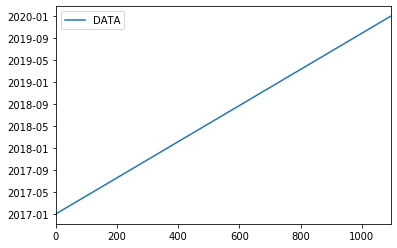

In [122]:
transit_2020.plot()

In [123]:
transit_2021 = aforaments['2021']

In [124]:
transit_2021.set_index('data', inplace=True)

In [125]:
ultimo_fecha = max(transit_2021.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(transit_2021.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
transit_2021 = transit_2021.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [126]:
transit_2021['Id_aforament'].replace(to_replace=np.NaN, value=2021, inplace=True)

In [127]:
transit_2021['VALIDO'].replace(to_replace=np.NaN, value=True, inplace=True)

In [128]:
mean_IMD_8 = transit_2021['Valor_IMD'].astype(float).mean(skipna=True) 

In [129]:
transit_2021['Valor_IMD'].replace(to_replace=np.nan, value=mean_IMD_8, inplace=True)

In [130]:
transit_2021.drop(['Any'], axis=1, inplace=True)

In [131]:
transit_2021.drop(['Id_aforament'], axis=1, inplace=True)

In [132]:
transit_2021.drop(['VALIDO'],axis=1, inplace=True)

In [133]:
transit_2021.index.names = ['DATA']
transit_2021 = transit_2021.reset_index()

In [134]:
transit_2021.to_csv('transit-2021', index=False)

In [135]:
transit_2021

,DATA,Valor_IMD
0,2017-01-01,3880
1,2017-01-02,4099
2,2017-01-03,4457
3,2017-01-04,2949
4,2017-01-05,2460
5,2017-01-06,3744.17
6,2017-01-07,3744.17
7,2017-01-08,3744.17
8,2017-01-09,3744.17
9,2017-01-10,3744.17


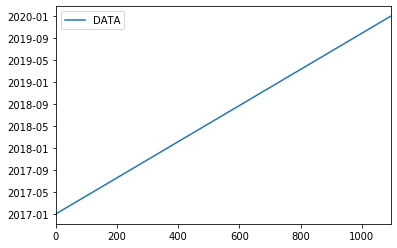

In [136]:
transit_2021.plot()